# Project IND-320
**Name** : _Izza Qamar_  
## Links
 - **GitHub Repository** : https://github.com/izzaqamar/Izza_Ind_320.git  

 - **Streamlit App** : https://izza-ind320.streamlit.app/

# Project Overview and AI Usage 

## AI tools
I have used **chatgpt** on multiple occassions. Initially it was used to understand how to connect my visual studio with github and then connecting github to streamlit. Then as the work progressed the major help I took was from chatgpt regarding the building of multipage streamlit app.
I used it to understand how graphs are created and how we can add customizations to our page like the sliders and selectbox. Lastly, it was used to create a 'Stay Tuned' text on the last page. Lastly I used chatgpt to understand how to export jupyter notebook as a pdf.Copilot was not used during the tasks.
  

## Project Overview
- This section contains brief desciption of jupyter notebook and streamlit app. 
  
   

 ### Jupter Notebook
 The project is comprised of two major tasks. Creating a jupyter notebook and a streamlit app.
 - For the jupyter notebook, I firstly created an outline of the major headings which includes the links to my github repository and streamlit app. 
 - Secondly, the section of 'Project overview and AI' section highlights the usage of different AI tools used in this project and a brief description of tasks performed in this project. 
 - Thirdly, the section 'Jupyter Work' includes the detailed code files. In this section, the first task is to load the file in form of dataframe from the csv using pandas and then display the first few rows and the datatypes of the columns to get an overview of how the data looks and the type of data it contains for easier understanding. The second task is to create two different kinds of plots. For this I use two different approaches to show and build on the fact that how effective our plots can be based on the function we use to create it. To plot each column separately, I used matplotlib and a for loop to create a line plot of each column against time (fixed as index of the dataframe). To plot all columns collectively, the numeric columns of the dataframe were first normalized as they had different scales. Then after adding the time column, the dataframe was converted to a long format using melt as plotly.express only supports that when plotting multiple columns together.
 

### Streamlit app
I created a multipage streamlit app where the entrypoint file named 'Homepage.py' and a folder named 'pages' share the same folder. Then in the folder 'pages' I added all the required pages namely 'First Months Insights' , 'Data Visualization' and 'Stay Tuned' and given them the number for the order of appearance in the sidebar according to my preference.
- 'First month insights' page displays the csv file in form of table using st.data_editor. Then the dataframe is filtered for January and restructured so that each column variable becomes a row and its respective values are displayed as a list in adjacent value column. LinechartColumn was used to create a table consisting of mini line charts of each weather variable.
- 'Data visualization' page mainly consists of three parts. Firstly, the data is read using caching and a slider is displayed, to select range of months to visualize. Subsequently, months in between the range are also selected. After this the dataframe is converted from wide format to long format (easier to plot using altair) and months column is added in the dataframe to filter the dataframe by the selected months. Secondly, a selectbox is displayed so the user can select the variable or all variables to visualize at the same time. Using the input from user I wrote a conditional statement that will filter the dataframe that is already filtered monthly by variable name from user and then create a plot accordingly using altair. The plots are customized by adding relevant labels,header and axis titles. 


# Jupyter Work
- The following sections contain the jupyter tasks. 

## Data Loading and Reading
 - In this section, we read and load the data from csv file and display the top few rows to see how the data looks.
 - We also see the type of the columns in the dataframe.

In [ ]:
import pandas as pd
#Reading csv as dataframe
open_meteo_df=pd.read_csv(r"D:\NMBU\semester_1\IND-320\Izza_Ind_320\open-meteo-subset.csv",parse_dates=['time'])
#open_meteo_df=pd.read_csv(r"D:\NMBU\semester_1\IND-320\Izza_Ind_320\open-meteo-subset.csv",parse_dates=['time'],index_col=0 )
#Displaying first few rows of dataframe and type of each column
print(open_meteo_df.head())
print(open_meteo_df)
open_meteo_df.dtypes

                 time  temperature_2m (°C)  precipitation (mm)  \
0 2020-01-01 00:00:00                 -2.2                 0.1   
1 2020-01-01 01:00:00                 -2.2                 0.0   
2 2020-01-01 02:00:00                 -2.3                 0.0   
3 2020-01-01 03:00:00                 -2.3                 0.0   
4 2020-01-01 04:00:00                 -2.7                 0.0   

   wind_speed_10m (m/s)  wind_gusts_10m (m/s)  wind_direction_10m (°)  
0                   9.6                  21.3                     284  
1                  10.6                  23.0                     282  
2                  11.0                  23.5                     284  
3                  10.6                  23.3                     284  
4                  10.6                  22.8                     284  
                    time  temperature_2m (°C)  precipitation (mm)  \
0    2020-01-01 00:00:00                 -2.2                 0.1   
1    2020-01-01 01:00:00         

time                      datetime64[ns]
temperature_2m (°C)              float64
precipitation (mm)               float64
wind_speed_10m (m/s)             float64
wind_gusts_10m (m/s)             float64
wind_direction_10m (°)             int64
dtype: object

##  Plots
 - In this section, we have following plots:
    - We plot each column separately as a function of time.
    - We collectively plot all columns together as a function of time.

### Column Plot
- Plotting each column separately.

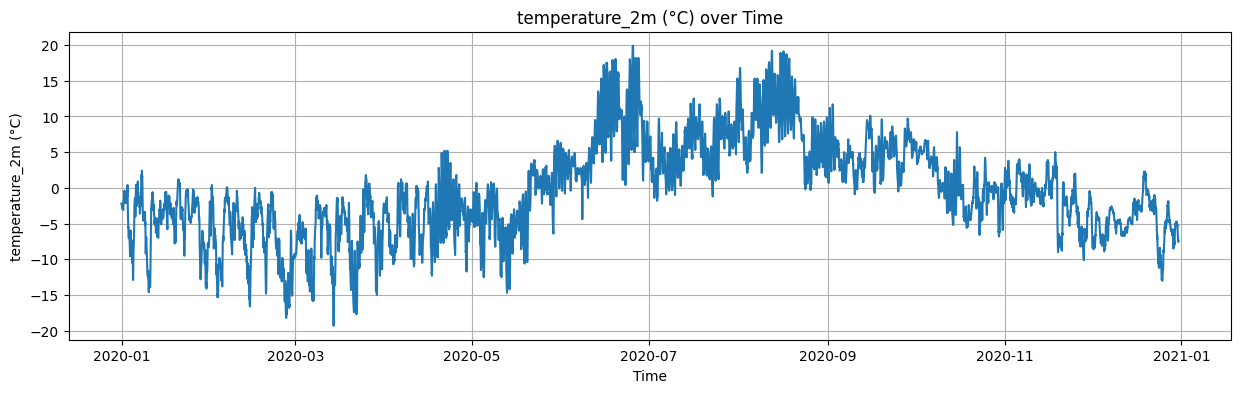

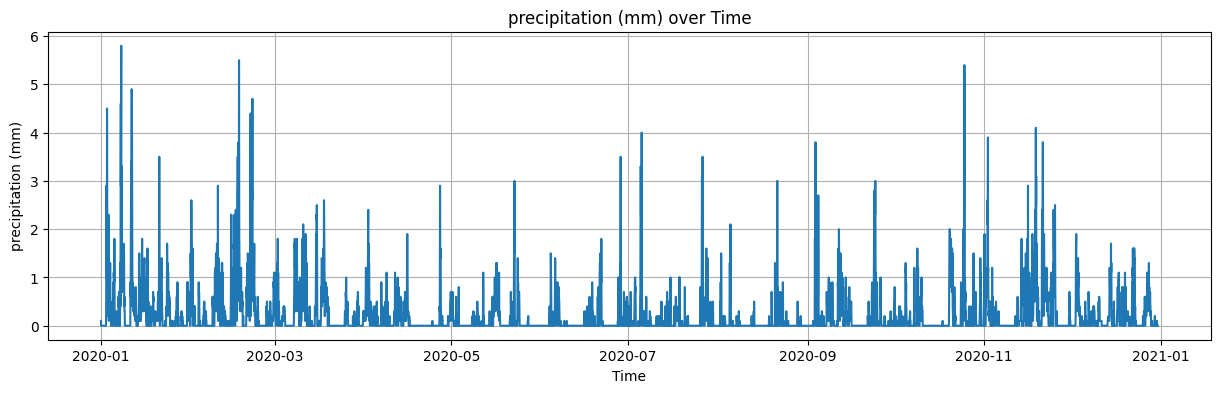

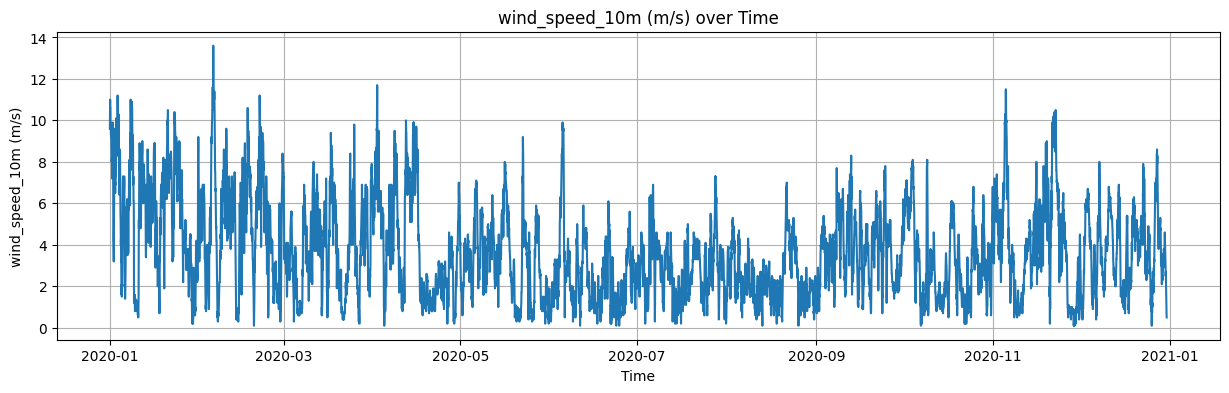

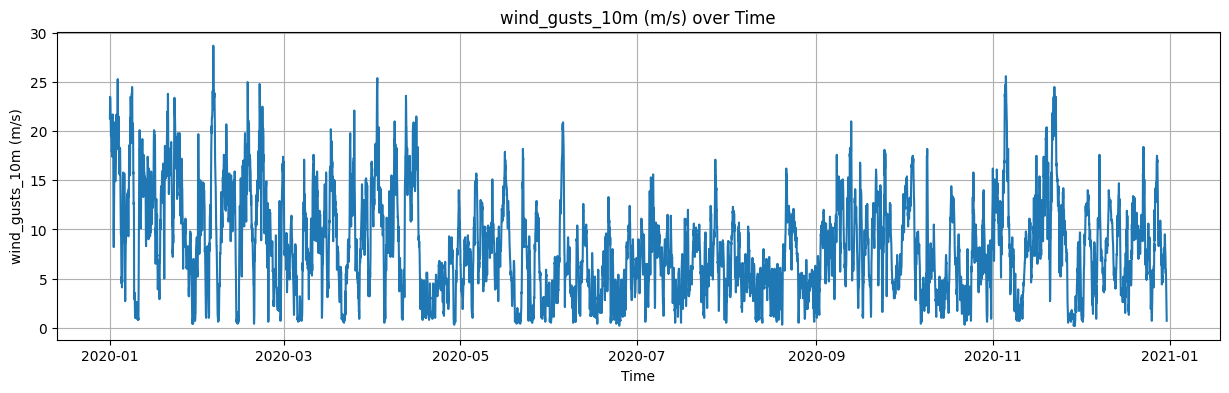

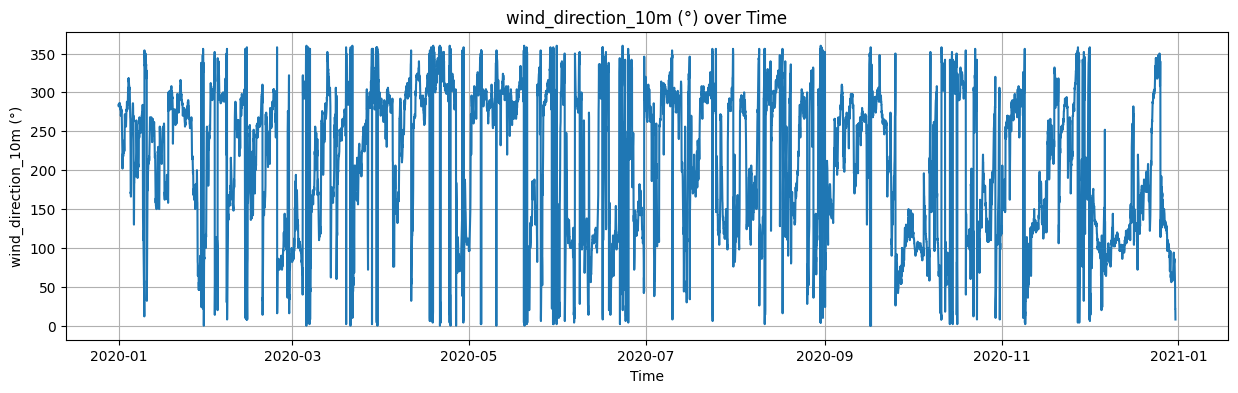

In [ ]:
import matplotlib.pyplot as plt
#Setting time as the index of df
open_meteo_df.set_index('time', inplace=True)
#Creating df of numeric columns
numeric_cols = open_meteo_df.select_dtypes(include='number')

#Plotting each column separately
for i, col in enumerate(numeric_cols.columns):
    plt.figure(figsize=(15, 4))
    plt.plot(open_meteo_df.index, numeric_cols[col])
    plt.title(f"{col} over Time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

### Collective Plot
- Plotting all columns together in a plot.

In [5]:
import plotly.express as px

#Normalizing the numeric dataframe as they are of different scale.
normalized_df = (numeric_cols - numeric_cols.min()) / (numeric_cols.max() - numeric_cols.min())

#Adding the time column to normalized dataframe
normalized_df['Time'] = open_meteo_df.index

#Converting from wide format to long format for Plotly Express as multiple columns are plotted
open_meteo_df_long = normalized_df.melt(id_vars='Time', var_name='Variable', value_name='Value')

#Creating the plot 
fig = px.line(open_meteo_df_long, x='Time', y='Value', color='Variable',
              title='Weather Data Over Time',
              labels={'Value': 'Normalized Weather Measurements', 'Time': 'Date'})

fig.update_layout(width=1000, height=500)
fig.show()